# Demo 2: Support Vector Machine (Classification)

# Read Data

In [1]:
from sklearn import datasets

In [2]:
# Load data
digits = datasets.load_digits()

# Task 1: Visualization
Visualize some images (X) of digit with their label (y)

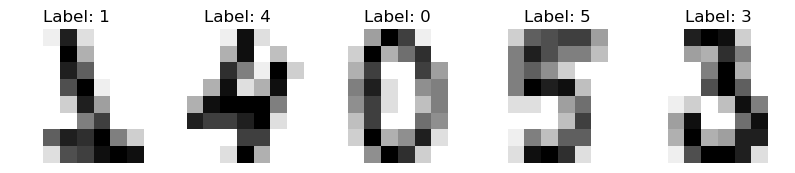

In [4]:
import matplotlib.pyplot as plt

start_index = 1000

_,axes = plt.subplots(nrows=1,ncols=5,figsize = (10,3))
for ax, image, label in zip(axes,digits.images[start_index:start_index+5],digits.target[start_index:start_index+5]):
    ax.set_axis_off()
    ax.imshow(image,cmap = plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Label: %i" % label)


# Task 2:  Training the model
-   In this task we will work with the Support Vector Classification model. In order to create an SVC model we have to consider which kernel we want to use.
-   In this task we will work with some kernels: Linear kernel('linear'), Radial Basis Function Kernel('rbf'), Polynomial Kernel('poly'), Sigmoid Kernel ('sigmoid'),..
-   References: [https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py](Plotting decision boundaries with diferent kernels)

## Task 2.1: Defaut kernel of svc model in sklearn library: Raidal Basis Function Kernel kernel='rbf'

In [6]:
from sklearn.svm import SVC
# Create SVC model with kernel is rbf
rbf_svc = SVC(C=10,kernel='rbf')

In [7]:
# Preparing data for training rbf_svc
## flatten the images or using data (which has been flatten)
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))
# data = digits.data
print(data.shape)
# Each image is flatten to a vector of 8*8 = 64 components
# There are total 1797 images of digit in our dataset


(1797, 64)


In [8]:
print(data.max())
print(data.min())

16.0
0.0


In [9]:
X = data/16
y = digits.target

### Task 2.1.1: Train Test split


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Split data into 80% train and 20% test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [12]:
print("Number of samples in the train subset:", len(y_train))
print("Number of samples in the test subset:", len(y_test))

Number of samples in the train subset: 1437
Number of samples in the test subset: 360


In [13]:
rbf_svc.fit(X_train,y_train)


SVC(C=10)

In [14]:
pred_test_rbf_10 = rbf_svc.predict(X_test)

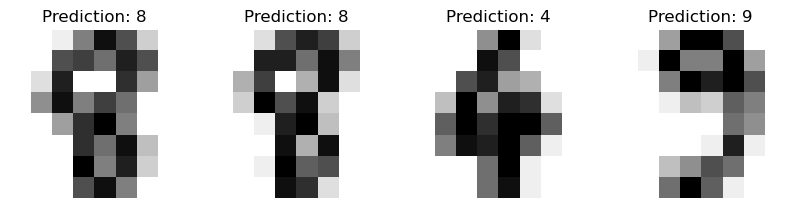

In [17]:
# Visualize the first 4 test samples and show their predicted digit value in the title.
_,axes = plt.subplots(nrows = 1,ncols = 4, figsize= (10,4))
for ax, image, prediction in zip(axes,X_test[100:100+4],pred_test_rbf_10[100:100+4]):
    ax.set_axis_off()
    image = image.reshape((8,8))
    ax.imshow(image, cmap = plt.cm.gray_r, interpolation = "nearest")
    ax.set_title(f"Prediction: {prediction}")

In [18]:
# Classification report:
from sklearn import metrics
print(f"Classification report for classifier {rbf_svc}:\n"
      f"{metrics.classification_report(y_test,pred_test_rbf_10)}\n")

Classification report for classifier SVC(C=10):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       1.00      0.86      0.93        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.95      1.00      0.97        36
           8       0.88      0.91      0.90        33
           9       0.92      0.92      0.92        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360




Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  2  0  0  3  0]
 [ 0  0  0  0 34  0  0  0  0  3]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  2  0  0  0  0  0  1 30  0]
 [ 0  0  0  0  0  1  0  1  1 34]]


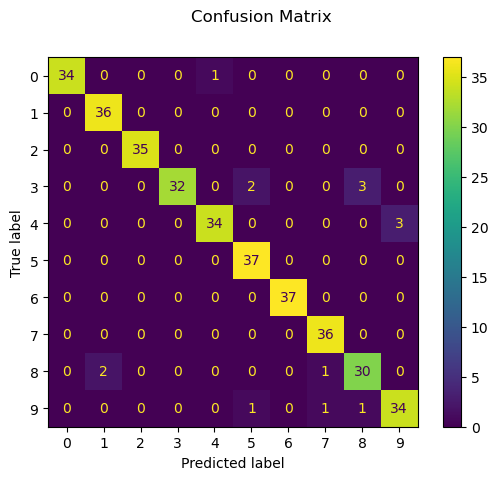

In [19]:
# Confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,pred_test_rbf_10)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,pred_test_rbf_10)

In [21]:
print(acc_score)

0.9583333333333334


In [27]:
# Same kernel with different C
Cs = [0.1,1,10,100,1000]
import time
def evaluate_rbf_svc(X_train,y_train,X_test,y_test,C):
    rbf_svc = SVC(C=C,kernel='rbf')
    start_time = time.time()
    rbf_svc.fit(X_train,y_train)
    end_time = time.time()
    train_time = end_time - start_time
    pred_test = rbf_svc.predict(X_test)
    return accuracy_score(y_test,pred_test),train_time

In [28]:
acc_score_holder = []
train_time_holder = []
for C in Cs:
    acc_score,train_time = evaluate_rbf_svc(X_train=X_train,
                                            y_train=y_train,
                                            X_test=X_test,
                                            y_test=y_test,
                                            C = C)
    acc_score_holder.append(acc_score)
    train_time_holder.append(train_time)

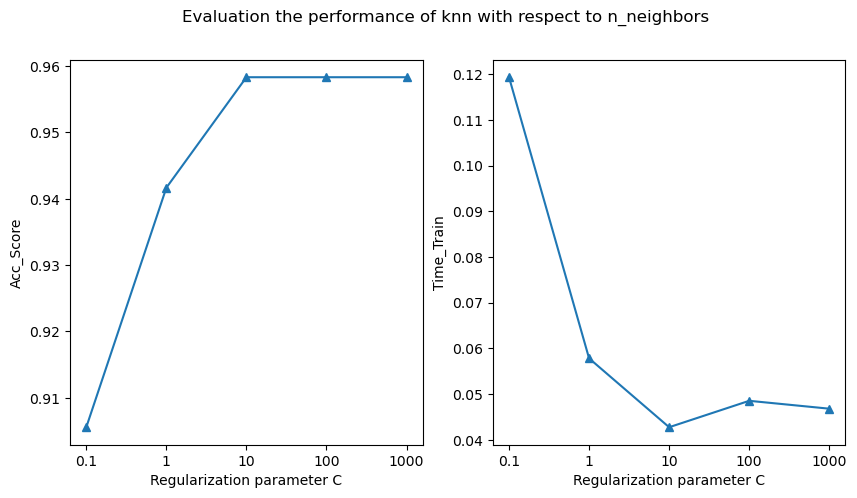

In [30]:
# Plot results to evaluate
CategoricalCs = [f'{C}' for C in Cs]
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Evaluation the performance of knn with respect to n_neighbors')

ax[0].plot(CategoricalCs,acc_score_holder,marker='^')

ax[0].set_ylabel("Acc_Score")
ax[0].set_xlabel("Regularization parameter C")

ax[1].plot(CategoricalCs,train_time_holder,marker='^')
ax[1].set_xlabel("Regularization parameter C")
ax[1].set_ylabel("Time_Train")
plt.show()

### Task 2.1.2 Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
def evaluate